In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def imshow(img, format="gray"):
    plt.figure()
    plt.axis('off')
    if format == "rgb":
        plt.imshow(img.astype(np.uint8), vmin=0, vmax=255)
    elif format == "bgr":
        plt.imshow(to_rgb(img).astype(np.uint8), vmin=0, vmax=255)
    elif format == "gray":
        plt.imshow(img.astype(np.uint8), cmap='gray', vmin=0, vmax=255)

def to_rgb(bgr_img):
    b, g, r = cv.split(bgr_img)
    return cv.merge([r, g, b])


def to_bgr(rgb_img):
    r, g, b = cv.split(rgb_img)
    return cv.merge([b, g, r]) 

In [3]:
draw_lines = False

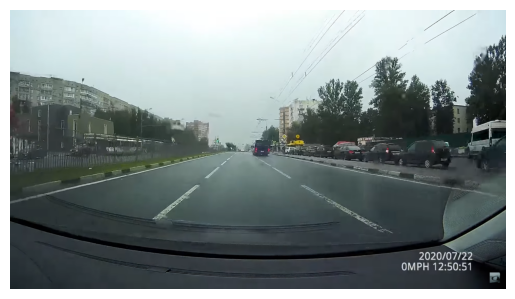

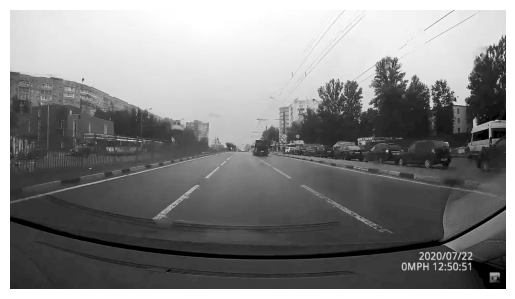

In [4]:
src = cv.imread("img.png", cv.IMREAD_GRAYSCALE)
c_src = cv.imread("img.png")
imshow(c_src, "bgr")
imshow(src)

In [5]:
def cut(img, x0, x1, y0, y1): # x0, x1, y0, y1 are ratios
    height, width = img.shape[0], img.shape[1]
    return img[int(height*y0):int(height*y1), int(width*x0):int(width*x1)], (int(width*x0), int(height*y0))

def rectangle(img, x0, x1, y0, y1):
    height, width = img.shape[0], img.shape[1]
    cv.rectangle(img, (int(width*x0), int(height*y0)), (int(width*x1), int(height*y1)), (100, 100, 100), thickness=3) 

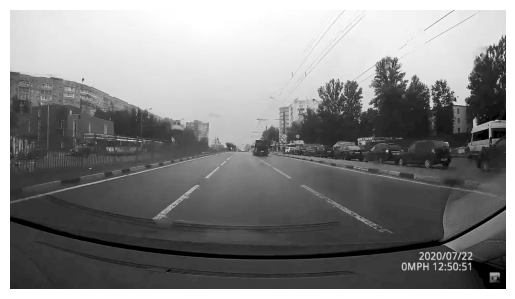

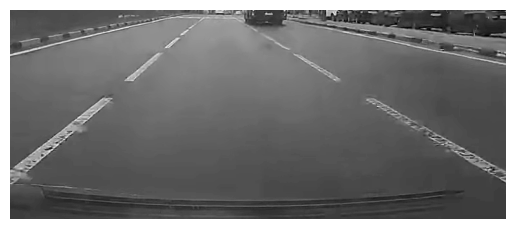

In [6]:
area, bias = cut(src, 0.3, 0.7, 0.5, 0.8)
imshow(src)
imshow(area)

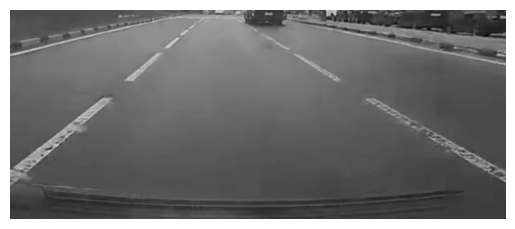

In [7]:
blurred = cv.blur(area, (3, 3))
imshow(blurred)

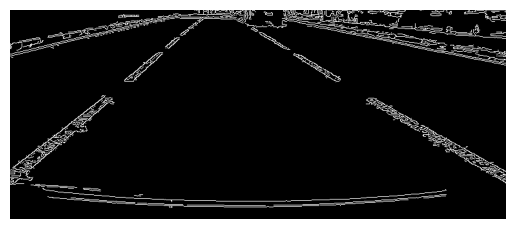

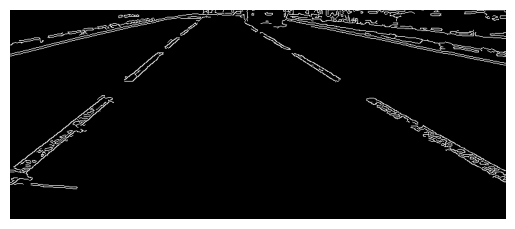

In [8]:
bounds_raw = cv.Canny(area, 50, 200, None, 3)
bounds = cv.Canny(blurred, 50, 200, None, 3)
imshow(bounds_raw)
imshow(bounds)

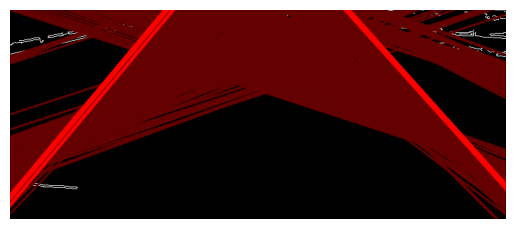

In [9]:
c_bounds = cv.cvtColor(bounds, cv.COLOR_GRAY2BGR)
lines1 = cv.HoughLines(bounds, 1, np.pi/180, 40, min_theta=0, max_theta=np.pi/2*0.8)
lines2 = cv.HoughLines(bounds, 1, np.pi/180, 40, min_theta=np.pi/2*1.2, max_theta=np.pi)
lines = np.array((list(lines1) + list(lines2)))
center = []
if lines is not None:
    for i in range(0, len(lines)): # shows all lines
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = [int(x0 + 1000*(-b)), int(y0 + 1000*(a))]
        pt2 = [int(x0 - 1000*(-b)), int(y0 - 1000*(a))]
        pt1[0] = 10000 if pt1[0] > 10000 else pt1[0]
        pt1[0] = -10000 if pt1[0] < -10000 else pt1[0]
        pt2[0] = 10000 if pt2[0] > 10000 else pt2[0]
        pt2[0] = -10000 if pt2[0] < -10000 else pt2[0]
        cv.line(c_bounds, pt1, pt2, (0, 0, 100), 2, cv.LINE_AA)

    for i in *np.where(lines == max(lines[:, 0, 1]))[0], *np.where(lines == min(lines[:, 0, 1]))[0]: # shows 2 main lines
        theta = lines[i][0][1]
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = [int(x0 + 1000*(-b)), int(y0 + 1000*(a))]
        pt2 = [int(x0 - 1000*(-b)), int(y0 - 1000*(a))]
        pt1[0] = 10000 if pt1[0] > 10000 else pt1[0]
        pt1[0] = -10000 if pt1[0] < -10000 else pt1[0]
        pt2[0] = 10000 if pt2[0] > 10000 else pt2[0]
        pt2[0] = -10000 if pt2[0] < -10000 else pt2[0]
        center.append([-a/b, rho/b])
        cv.line(c_bounds, pt1, pt2, (0, 0, 255), 3, cv.LINE_AA)

    points = [np.mean((-center[0][1]/center[0][0], -center[1][1]/center[1][0])), 
            np.mean(((1000-center[0][1])/center[0][0], (1000-center[1][1])/center[1][0]))]
    pt1 = [int(points[0] + bias[0]), int(bias[1])]
    pt2 = [int(points[1] + bias[0]), int(1000 + bias[1])]

    pt1[0] = 10000 if pt1[0] > 10000 else pt1[0]
    pt1[0] = -10000 if pt1[0] < -10000 else pt1[0]
    pt2[0] = 10000 if pt2[0] > 10000 else pt2[0]
    pt2[0] = -10000 if pt2[0] < -10000 else pt2[0]
    cv.line(c_src, pt1, pt2, (0, 255, 0), 5, cv.LINE_AA)

imshow(c_bounds, "bgr")

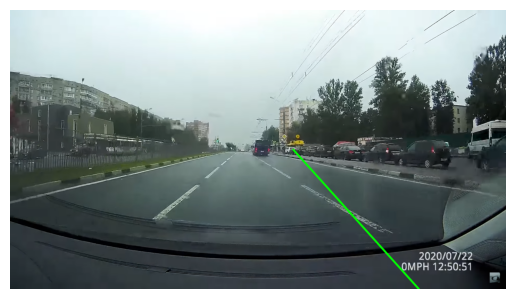

In [10]:
center = []
if lines is not None:
    for i in *np.where(lines == max(lines[:, 0, 1]))[0], *np.where(lines == min(lines[:, 0, 1]))[0]: # shows 2 main lines
        theta = lines[i][0][1]
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        center.append([-a/b, rho/b])
        if draw_lines:
            x0 = a * rho
            y0 = b * rho
            pt1 = [int(x0 + 1000*(-b)) + bias[0], int(y0 + 1000*(a)) + bias[1]]
            pt2 = [int(x0 - 1000*(-b)) + bias[0], int(y0 - 1000*(a)) + bias[1]]
            pt1[0] = 10000 if pt1[0] > 10000 else pt1[0]
            pt1[0] = -10000 if pt1[0] < -10000 else pt1[0]
            pt2[0] = 10000 if pt2[0] > 10000 else pt2[0]
            pt2[0] = -10000 if pt2[0] < -10000 else pt2[0]
            cv.line(c_src, pt1, pt2, (0, 0, 255), 3, cv.LINE_AA)

    points = [np.mean((-center[0][1]/center[0][0], -center[1][1]/center[1][0])), 
            np.mean(((1000-center[0][1])/center[0][0], (1000-center[1][1])/center[1][0]))]
    pt1 = [int(points[0] + bias[0]), int(bias[1])]
    pt2 = [int(points[1] + bias[0]), int(1000 + bias[1])]

    pt1[0] = 10000 if pt1[0] > 10000 else pt1[0]
    pt1[0] = -10000 if pt1[0] < -10000 else pt1[0]
    pt2[0] = 10000 if pt2[0] > 10000 else pt2[0]
    pt2[0] = -10000 if pt2[0] < -10000 else pt2[0]
    cv.line(c_src, pt1, pt2, (0, 255, 0), 5, cv.LINE_AA)
    #cv.line(c_src, (c_src.shape[1]//2, c_src.shape[0]//2), (c_src.shape[1]//2, c_src.shape[0]), (255, 0, 0), 5, cv.LINE_AA)

imshow(c_src, "bgr")